In [ ]:
pip install plotly

In [1]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go
import pylab as pl
import json 
import os

## Importar las bases de datos de cada trader

In [52]:
balance = pd.read_excel('Archivos/BalanceTraders.xlsx').iloc[2:-1, :]
balance.columns = ['Trader', 'Balance']

coma = ','

# Arriesgados
YellowBrick = pd.read_csv('Archivos/YellowBrick.csv',coma).iloc[:,1:13]
TurtleSafe = pd.read_csv('Archivos/TurtleSafe.csv',coma).iloc[:,0:13]
SFEPriceAction = pd.read_csv('Archivos/SFEPriceAction.csv',coma).iloc[:,0:13]
REVERSESANZON = pd.read_csv('Archivos/REVERSESANZON.csv',coma).iloc[:,0:13]
NinjaTrainer = pd.read_csv('Archivos/NinjaTrainer.csv',coma).iloc[:,0:13]
NightProfit = pd.read_csv('Archivos/NightProfit.csv',coma).iloc[:,0:13]
NightOwl = pd.read_csv('Archivos/NightOwl.csv',coma).iloc[:,0:13]
Financially = pd.read_csv('Archivos/Financially.csv',coma).iloc[:,0:13]
Dragon = pd.read_csv('Archivos/Dragon.csv',coma).iloc[:,0:13]
Consistency = pd.read_csv('Archivos/Consistency.csv',coma).iloc[:,0:13]
CandelabrumQuiet = pd.read_csv('Archivos/CandelabrumQuiet.csv',coma).iloc[:,0:13]
BreakthroughSt = pd.read_csv('Archivos/BreakthroughSt.csv',coma).iloc[:,0:13]
ATLAS = pd.read_csv('Archivos/ATLAS.csv',coma).iloc[:,0:13]
AlphaDayWalker = pd.read_csv('Archivos/ATLAS.csv',coma).iloc[:,0:13]
LyraFX = pd.read_csv('Archivos/LyraFX.csv',coma).iloc[:,0:13]
Turn_UP_AUDCAD = pd.read_csv('Archivos/15M_Turn_UP_AUDCAD.csv',coma).iloc[:,0:13]

#Conservador
Night_Eagle = pd.read_csv('Archivos/Night_Eagle.csv',coma).iloc[:,0:13]
Wealthwelt = pd.read_csv('Archivos/Wealthwelt.csv',coma).iloc[:,0:13]
TheWitcher = pd.read_csv('Archivos/TheWitcher.csv',coma).iloc[:,0:13]


#Moderados
ForexRealProfit = pd.read_csv('Archivos/ForexRealProfit.csv',coma).iloc[:,0:13]
CandelabrumQuiet = pd.read_csv('Archivos/CandelabrumQuiet.csv',coma).iloc[:,0:13]
TrendFollower = pd.read_csv('Archivos/TrendFollower.csv',coma).iloc[:,0:13]
NightVisionEA = pd.read_csv('Archivos/NightVisionEA.csv',coma).iloc[:,0:13]
Anomarion = pd.read_csv('Archivos/Anomarion.csv',coma).iloc[:,0:13]




DORDOL_USDCAD = pd.read_csv('Archivos/DORDOL_USDCAD.csv',coma).iloc[:,0:13]
KANAE_USDJPY = pd.read_csv('Archivos/KANAE_USDJPY.csv',coma).iloc[:,0:13]



## Tabla en formato JSON con Profit, capital acumulado y cambio porcentual

In [11]:
def Profit(Trader, balance):
    "Función que genera una tabla en formato JSON con el Profit, Capital Acumulado y"
    "cambio porcentual de cada trader"
    
        #Profit diario 
    profit = pd.DataFrame(Trader.groupby(['Close Date'])['Profit'].sum()).reset_index()

        #Obtenemos el capital acumulado + capital inicial
    capital =  balance 
    capital_acm = []

    for i in range(0,len(Trader)):
        capital = profit['Profit'][i] + capital
        capital_acm.append(capital)
    profit["Capital Acumulado"] = capital_acm
    
        #Cambio porcentual del capital acumulado de cada trader
    Porcentaje = []
    for i in range(0,len(profit)):
        porc = round(((profit['Capital Acumulado'][i] / capital) - 1) * 100, 2)
        Porcentaje.append(porc)
    profit["Cambio %"] = Porcentaje
    
    return profit.to_json()


## Guardar la tabla Profit en formato JSON

In [10]:
a = Profit(DORDOL_USDCAD, 3646.91)

dir = 'Archivos/Profits_JSON/'
file_name = "Profit.json"

with open(os.path.join(dir, file_name), 'w') as file:
    json.dump(a, file)

## Drawdown

In [58]:
def Drawdown(Trader, balance):
        #Profit diario 
    profit = pd.DataFrame(Trader.groupby(['Close Date'])['Profit'].sum()).reset_index()

        #Obtenemos el capital acumulado + capital inicial
    capital =  balance 
    capital_acm = []

    for i in range(0,len(Trader)):
        capital = profit['Profit'][i] + capital
        capital_acm.append(capital)
    profit["Capital Acumulado"] = capital_acm
    
        #Cambio porcentual del capital acumulado de cada trader
    Porcentaje = []
    for i in range(0,len(profit)):
        porc = round(((profit['Capital Acumulado'][i] / capital) - 1) * 100, 2)
        Porcentaje.append(porc)
    profit["Cambio %"] = Porcentaje

    #Obtenemos el cálculo del Drawdown como medida de riesgo para YellowBrick
    Draw_d_0 = profit[['Close Date','Capital Acumulado']]
    Draw_d_0.set_index('Close Date', inplace=True)

    Draw_d_1 = Draw_d_0['Capital Acumulado'].cummax()
    drawdown = (Draw_d_0['Capital Acumulado'] - Draw_d_1 )/Draw_d_1 
    fecha_drawdown = drawdown.idxmin()
    Po_draw_down = drawdown.min()
    DrawDown = (Po_draw_down * 100) * (-1)

    #Clasificamos al trader segun el tipo de Drawdown que obtuvo
    trader = []
    DrawDown = round(DrawDown)
    if DrawDown in range (-0, 3):
        trader = "Conservador"
    elif  DrawDown in range (3,12):
        trader = "Moderado"
    else:
        trader = "Arriesgado"
    return trader
        

Drawdown(DORDOL_USDCAD, 3646.91)

'Arriesgado'

**Tabla con información de todos los traders**

In [79]:
tabla = [YellowBrick, TurtleSafe, SFEPriceAction, REVERSESANZON, NightProfit, NightOwl, ForexRealProfit, Financially,
         Dragon, Consistency, CandelabrumQuiet, BreakthroughSt, ATLAS, AlphaDayWalker]
data = pd.concat(tabla, sort='False', ignore_index='True')

## Estadística descriptiva de cada trader

In [ ]:
display(YellowBrick.describe(), TurtleSafe.describe(), SFEPriceAction.describe(), REVERSESANZON.describe(), 
        NightProfit.describe(), NightOwl.describe(), ForexRealProfit.describe(), Financially.describe(),
        Dragon.describe(), Consistency.describe(), CandelabrumQuiet.describe(), BreakthroughSt.describe(), 
        ATLAS.describe(), AlphaDayWalker.describe())

## Gráfica efectividad por instrumento

In [72]:
def GraficaEfectividad(Trader):
    efect_x = Trader['Symbol'].unique()
    efect_y = []
    for x in efect_x:
        df_x = Trader[Trader['Symbol'] == x]
        positivos = len(df_x[df_x['Profit'] >= 0])
        efect_y.append((positivos / len(df_x)) * 100)

    pl.figure(figsize=(15, 8))
    pl.bar(efect_x, efect_y)
    

### Guardar gráfica efectividad en formato JSON

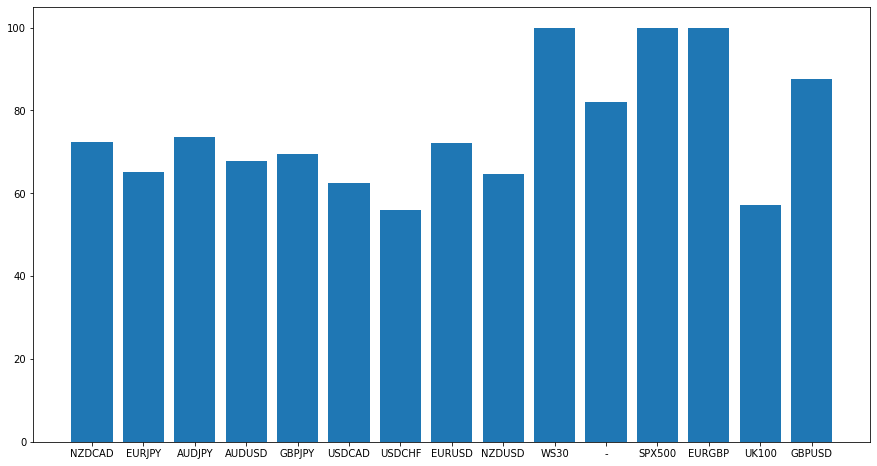

In [78]:
grafica = GraficaEfectividad(YellowBrick)


dir = 'Archivos/Graficas_Efectividad/'
file_name = "efectividad.json"

with open(os.path.join(dir, file_name), 'w') as file:
    json.dump(grafica, file)

In [ ]:
# La gráfica de arriba reemplaza este código, pero no se si podemos usar matplotlib

figBar = go.Figure(
        [go.Bar(name='Porcentaje de efectividad', x=efect_x, y=efect_y, hovertemplate="Efectividad del: %{y:.2f}%<br>",
                marker_color=['#343434', '#7FB7BE', '#D3F3EE', '#DACC3E', '#BC2C1A', '#D7816A', '#9F7E69', '#F5853F',
                              '#BD4F6C', '#8F8389'],
                showlegend=False)])


In [ ]:
Efectividad= pd.DataFrame(efect_x)
Efectividad["Porcentaje"] = efect_y
Efectividad.rename(columns={0:'Symbol'},
              inplace=True)
Efectividad["Porcentaje"] = round(Efectividad["Porcentaje"],2)
Efectividad

In [ ]:
Efectividad = ff.create_table(Efectividad, height_constant=60)
Efectividad

## Gráficas

**Simulación de capital inversionista**

In [ ]:
Inversionista = 100 #Capital que el inversionista quiere simular
Inver_Porcentaje = Inversionista / capital
Capital_Inver = []
for i in range(0,len(Profit)):
    capitalinver = round(Profit['Capital Acumulado'][i] * Inver_Porcentaje,2)
    Capital_Inver.append(capitalinver)
Profit["Capital Inversionista"] = Capital_Inver
fig = ff.create_table(Profit , height_constant=60)
fig

In [ ]:
fig_01 = go.Figure([go.Scatter(x=Profit['Close Date'], y=Profit['Capital Inversionista'])])
fig_01.update_xaxes(rangeslider_visible=True)
fig_01.show()